En este scrip se pone el proyecto de manera ordenada con los pasos 

In [19]:
#Imporamos las librerias 

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import cv2 
import numpy as np
from numpy.random import randint
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import visualkeras

In [2]:
# Definimos la ruta a la carpeta que contiene las imágenes que se usaran para entrenar 
data_test = os.getcwd() + "/brain_tumor_mris/Testing"

# Cargamos las imágenes que se usaran para entrenar 
images_test = []
labels_test = []
for category in os.listdir(data_test):
  category_dir = os.path.join(data_test, category)
  for image_file in os.listdir(category_dir):
    #image_test = cv2.imread(os.path.join(category_dir, image_file), cv2.IMREAD_GRAYSCALE)
    image_test = cv2.imread(os.path.join(category_dir, image_file))
    image_test = cv2.resize(image_test, (64, 64))  # Redimensionamos las imágenes a 224x224
    #cv2.imshow("check", image_train)
    #cv2.waitKey(0)
    images_test.append(image_test)
    labels_test.append(category)
#cv2.destroyAllWindows()
# Convertimos las imágenes a un formato compatible con TensorFlow
images_test = np.array(images_test)
images_test = images_test.astype(np.float32)

In [3]:
#De manera opcional podemos imprimir los labels para corroborar que se guardaron de manera correcta 
#print(labels_test)

In [4]:
# Definimos la ruta a la carpeta que contiene las imágenes que se usaran para probar
data_train = os.getcwd() + "/brain_tumor_mris/Training"

# Cargamos las imágenes que se usaran para entrenar 
images_train = []
labels_train = []
for category in os.listdir(data_train):
  category_dir = os.path.join(data_train, category)
  for image_file in os.listdir(category_dir):
    #image_train = cv2.imread(os.path.join(category_dir, image_file), cv2.IMREAD_GRAYSCALE)
    image_train = cv2.imread(os.path.join(category_dir, image_file))
    image_train = cv2.resize(image_train, (64, 64))  # Redimensionamos las imágenes a 224x224
    #cv2.imshow("check", image_train)
    #cv2.waitKey(0)
    images_train.append(image_train)
    labels_train.append(category)
#cv2.destroyAllWindows()
# Convertimos las imágenes a un formato compatible con TensorFlow
images_train = np.array(images_train)
images_train = images_train.astype(np.float32)

In [5]:
#Normalizamos las imagenes 
images_train, images_test = images_train/255.0, images_test/255.0

In [6]:
#Creamos una variable para que sea aleatoria entre los valores de las imagenes para poder representar 25 de ellas al azar
indexs = randint(0, len(images_train), 25)
indexs

array([4410, 4612, 1229, 2269,  408, 2505, 4482, 3162, 1347, 4271, 3750,
       4109, 3252, 3660,  594, 2725, 1740, 4657, 1153, 3599,  698,  130,
        342, 2690,  609])

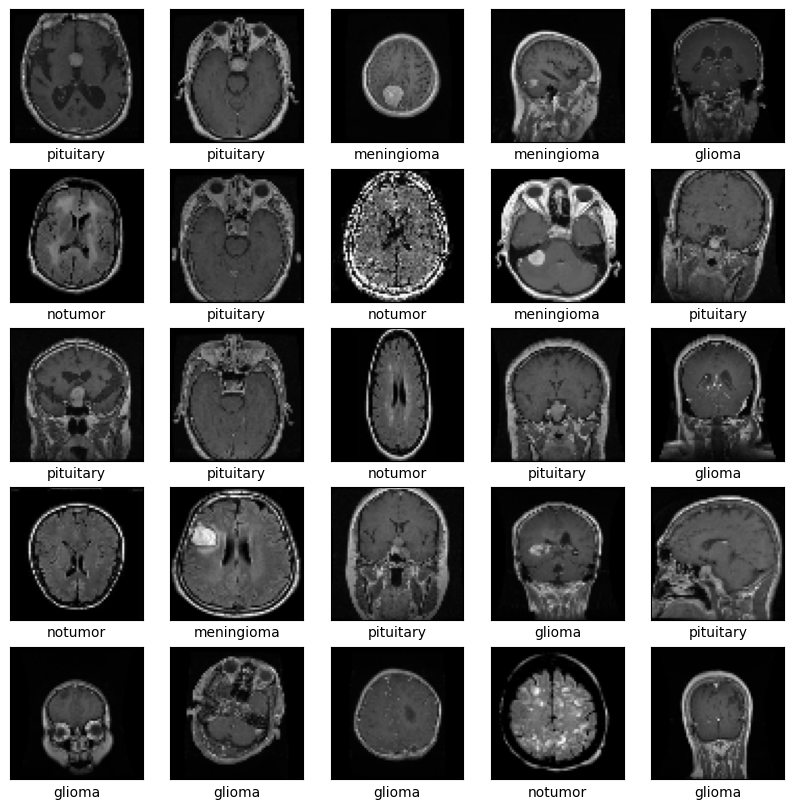

In [7]:
class_names = ['glioma','meningioma','notumor','pituitary']


plt.figure(figsize=(10,10))
for i, j in zip(range(25), indexs):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images_train[j])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(labels_train[j])
plt.show()

Una vez que se corrobora que las imagenes se encuentran de manera correcta procedemos a cambiar los valores de las etiquetas por carácteres númericos 


In [8]:
# Inicializar el objeto LabelEncoder
encoder = LabelEncoder()

In [9]:
# Ajustar y transformar las etiquetas a números
labels_tra = encoder.fit_transform(labels_train)

# Mostrar las etiquetas numéricas correspondientes
#print(labels_tra)

In [10]:
# Ajustar y transformar las etiquetas a números
labels_tes = encoder.fit_transform(labels_test)

# Mostrar las etiquetas numéricas correspondientes
#print(labels_tes)

Un paso antes de comenzar con el diseño del modelo es verificar que las dimensiones sean las correctas en la matrzi generada así como la de las etiquetas 

In [11]:
print(images_train.shape)
print(labels_tra.shape)
print(images_test.shape)
print(labels_tes.shape)

(4672, 64, 64, 3)
(4672,)
(576, 64, 64, 3)
(576,)


#### Definimos nuestra base convulocional CNN usando tensorflow
La línea de código activation='relu' indica que la salida de la capa de convolución se convertirá en la entrada de la siguiente capa mediante la función ReLU

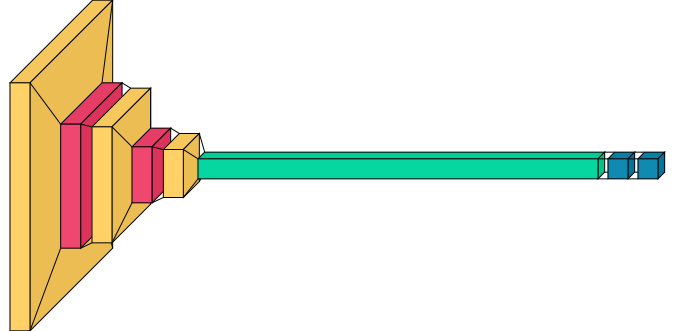

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))) #Ajustamos el modelo para que su entrada sea de 256x256 y en escala de grises
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten()),
model.add(layers.Dense(64, activation='relu'),)
model.add(layers.Dense(10, activation='softmax'),)

visualkeras.layered_view(model)

##### Agregue capas densas en la parte superior
Para completar el modelo, alimentará el último tensor de salida de la base convolucional (de forma (4, 4, 64)) en una o más capas densas para realizar la clasificación. Las capas densas toman vectores como entrada (que son 1D), mientras que la salida actual es un tensor 3D. Primero, aplanará (o desenrollará) la salida 3D a 1D, luego agregará una o más capas densas en la parte superior. CIFAR tiene 10 clases de salida, por lo que usa una capa Densa final con 10 salidas.

#### Compilamos el modelo

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Entrenamos el modelo

In [29]:
history = model.fit(images_train, labels_tra, epochs=10,  validation_data=(images_test, labels_tes))

Epoch 1/10


C:\Users\IGLCH\anaconda3\Lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


146/146 [==============================] - 13s 80ms/step - loss: 0.8103 - accuracy: 0.6719 - val_loss: 0.7603 - val_accuracy: 0.7083
Epoch 2/10
146/146 [==============================] - 11s 77ms/step - loss: 0.4642 - accuracy: 0.8337 - val_loss: 0.5830 - val_accuracy: 0.7830
Epoch 3/10
146/146 [==============================] - 12s 83ms/step - loss: 0.3250 - accuracy: 0.8825 - val_loss: 0.3867 - val_accuracy: 0.8542
Epoch 4/10
146/146 [==============================] - 13s 87ms/step - loss: 0.2481 - accuracy: 0.9092 - val_loss: 0.3293 - val_accuracy: 0.8854
Epoch 5/10
146/146 [==============================] - 13s 87ms/step - loss: 0.1723 - accuracy: 0.9433 - val_loss: 0.2038 - val_accuracy: 0.9375
Epoch 6/10
146/146 [==============================] - 12s 85ms/step - loss: 0.1400 - accuracy: 0.9516 - val_loss: 0.2574 - val_accuracy: 0.9167
Epoch 7/10
146/146 [==============================] - 12s 84ms/step - loss: 0.0929 - accuracy: 0.9681 - val_loss: 0.2029 - val_accuracy: 0.9410
Epo

18/18 - 0s - loss: 0.1728 - accuracy: 0.9514 - 448ms/epoch - 25ms/step


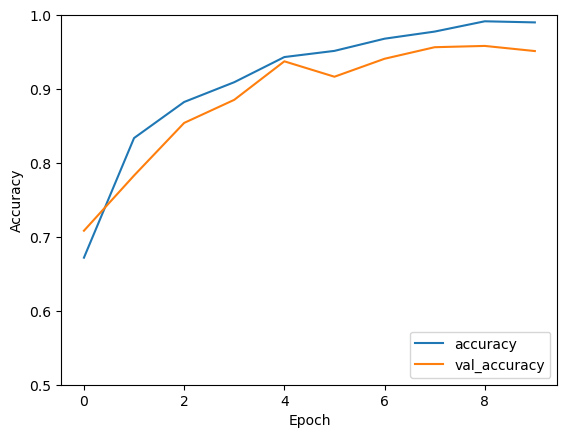

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(images_test,  labels_tes, verbose=2)


In [17]:
print(test_acc)

0.9618055820465088
